### Genres

##### 1. Cleaning Dataframe

In [3]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv

#open env file
load_dotenv('lastfm_vars.env')

#extract the api key
key = os.getenv('LASTFM_KEY')

In [2]:


file= 'likedSongs.csv'
df = pd.read_csv(file)

df= df.drop([' Playlist name', ' Type'], axis= 1)
#get rid of leading space in headers
df= df.rename(columns={ 
                       ' Artist name' : "Artist", 
                       'Track name' : "Track", 
                       ' Album' : "Album", 
                       " ISRC" : "ISRC" 
                       })


df.head(3)

,Track,Artist,Album,ISRC
0,恢复,2814,新しい日の誕生,USA2P1501865
1,Судно (Борис Рижий),Molchat Doma,Этажи,AEA0D1846146
2,На Дне,Molchat Doma,Этажи,AEA0D1846140


##### 2. Create a function that extracts the genre from the json response file

In [5]:
def getGenre(response_dict):
    names= []
    try:
        for key, values in response_dict.items():
            if key=='tags':
                for key, value in values.items():
                    for i in value:
                        #for key, value in i.items():
                        try:
                            genre= value[0]['name']
                            for i in value:
                               names.append(value)
                            return genre  #the first list's name key's value
                        except: 
                            return 'x' #return x if value not a list or no dictionary within
    except:
        return 'y' #return y if response not in dictionary form

    

In [4]:
url = "http://ws.audioscrobbler.com/2.0/?" 
url+= "method=artist.getinfo"
url+= "&api_key="+key
url+= "&artist="+ 'Yes'
url+= "&album="+'relayer'
url+= "&format=json"

response= requests.get(url) #call a json response with parameters

if response.status_code != 200: #if the response code is not 200 tell user
    print('Status code: ', response.status_code)

else:
    try:
        result= response.json()['artist'] #create dictionary of json response
    except:
        result= response.json()
genre= getGenre(result) #some json responses dont have artist dictionary

print(genre)
  

NameError: name 'getGenre' is not defined

##### 3. Create a function that outputs a genre for a row of data

In [2]:
#function that spits a result dictionary for given artist and album
def getInfo(row, key=key):
    #album= f"'{row['Album']}'"
    
    url = "http://ws.audioscrobbler.com/2.0/?" 
    url+= "method=artist.getinfo"
    url+= "&api_key="+key
    url+= "&artist="+ row['Artist'] 
    #url+= "&album="+album
    url+= "&format=json"

    response= requests.get(url) #call a json response with parameters

    if response.status_code != 200: #if the response code is not 200 tell user
        print('Status code: ', response.status_code)

    else:
        try:
            result= response.json()['artist'] #create dictionary of json response
        except:
            result= response.json()
    try: 
        genre= getGenre(result) #some json responses dont have artist dictionary
        return genre
    
    except: 
        return 'z' #return z if get genre doesnt work

In [7]:
for i in range(200, 205):
    print(df.iloc[i][1], getInfo(df.iloc[i], key))

Atoms For Peace electronic
Francis Lai Soundtrack
Weezer rock
Weezer rock
Desire doom metal


In [248]:
print(getInfo(df.iloc[3]),key)

rock


##### 4. Run the request and filtering on the data frame and output to a new column

Split df in half because api times out

In [301]:
print(2876/2)#half the df

1438.0


In [302]:
#create two df from orig df
df1= df.iloc[0 : 1438]
df2 = df.iloc[1439 : 2876] 

In [303]:
#apply the functions
df1['Genre'] = df1.apply(getInfo, axis= 1) #run functions on df and output to new field
df1

C:\Users\Christian Anderson\AppData\Local\Temp\ipykernel_13808\2511756107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Genre'] = df1.apply(getInfo, axis= 1) #run functions on df and output to new field


In [305]:
df2['Genre'] = df2.apply(getInfo, axis= 1) #run functions on df and output to new field
df2

C:\Users\Christian Anderson\AppData\Local\Temp\ipykernel_13808\3861850407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Genre'] = df2.apply(getInfo, axis= 1) #run functions on df and output to new field


,Track,Artist,Album,ISRC,Genre
1439,Lucidity,Soen,Lucidity,DENV61600405,Progressive metal
1440,Lucidity,Tame Impala,InnerSpeaker,AUUM71000134,Psychedelic Rock
1441,Lucid Dream,Glue Trip,Glue Trip,US7VG1620689,psychedelic
1442,Lowlands of Holland,Steeleye Span,Hark! The Village Wait,GBAJE0508777,folk
1443,Lower the Heavens,The Donkeys,The Donkeys,US4AJ0651605,rock
...,...,...,...,...,...
2871,10's,Pantera,The Great Southern Trendkill,USEW29600004,thrash metal
2872,10:37,Beach House,Depression Cherry,USSUB1512205,dream pop
2873,10:37,Beach House,Depression Cherry,USSUB1512205,dream pop
2874,"10,000 Days (Wings Pt 2)",TOOL,"10,000 Days",USVR10600022,Progressive metal


In [306]:
final_df= pd.concat([df1, df2], ignore_index=True)

In [307]:
final_df.to_csv("songsGenres.csv")

In [9]:
new_df= pd.read_csv('songsGenres.csv')
new_df.head(3)

,Unnamed: 0,Track,Artist,Album,ISRC,Genre
0,0,恢复,2814,新しい日の誕生,USA2P1501865,ambient
1,1,Судно (Борис Рижий),Molchat Doma,Этажи,AEA0D1846146,post-punk
2,2,На Дне,Molchat Doma,Этажи,AEA0D1846140,post-punk


Top 5 genres

In [25]:
counts = new_df['Genre'].value_counts()
topfive= pd.DataFrame(counts[0:5])
topfive

,Genre
Progressive rock,286
electronic,189
classic rock,139
alternative,128
Progressive metal,124


##### 5. Plot result

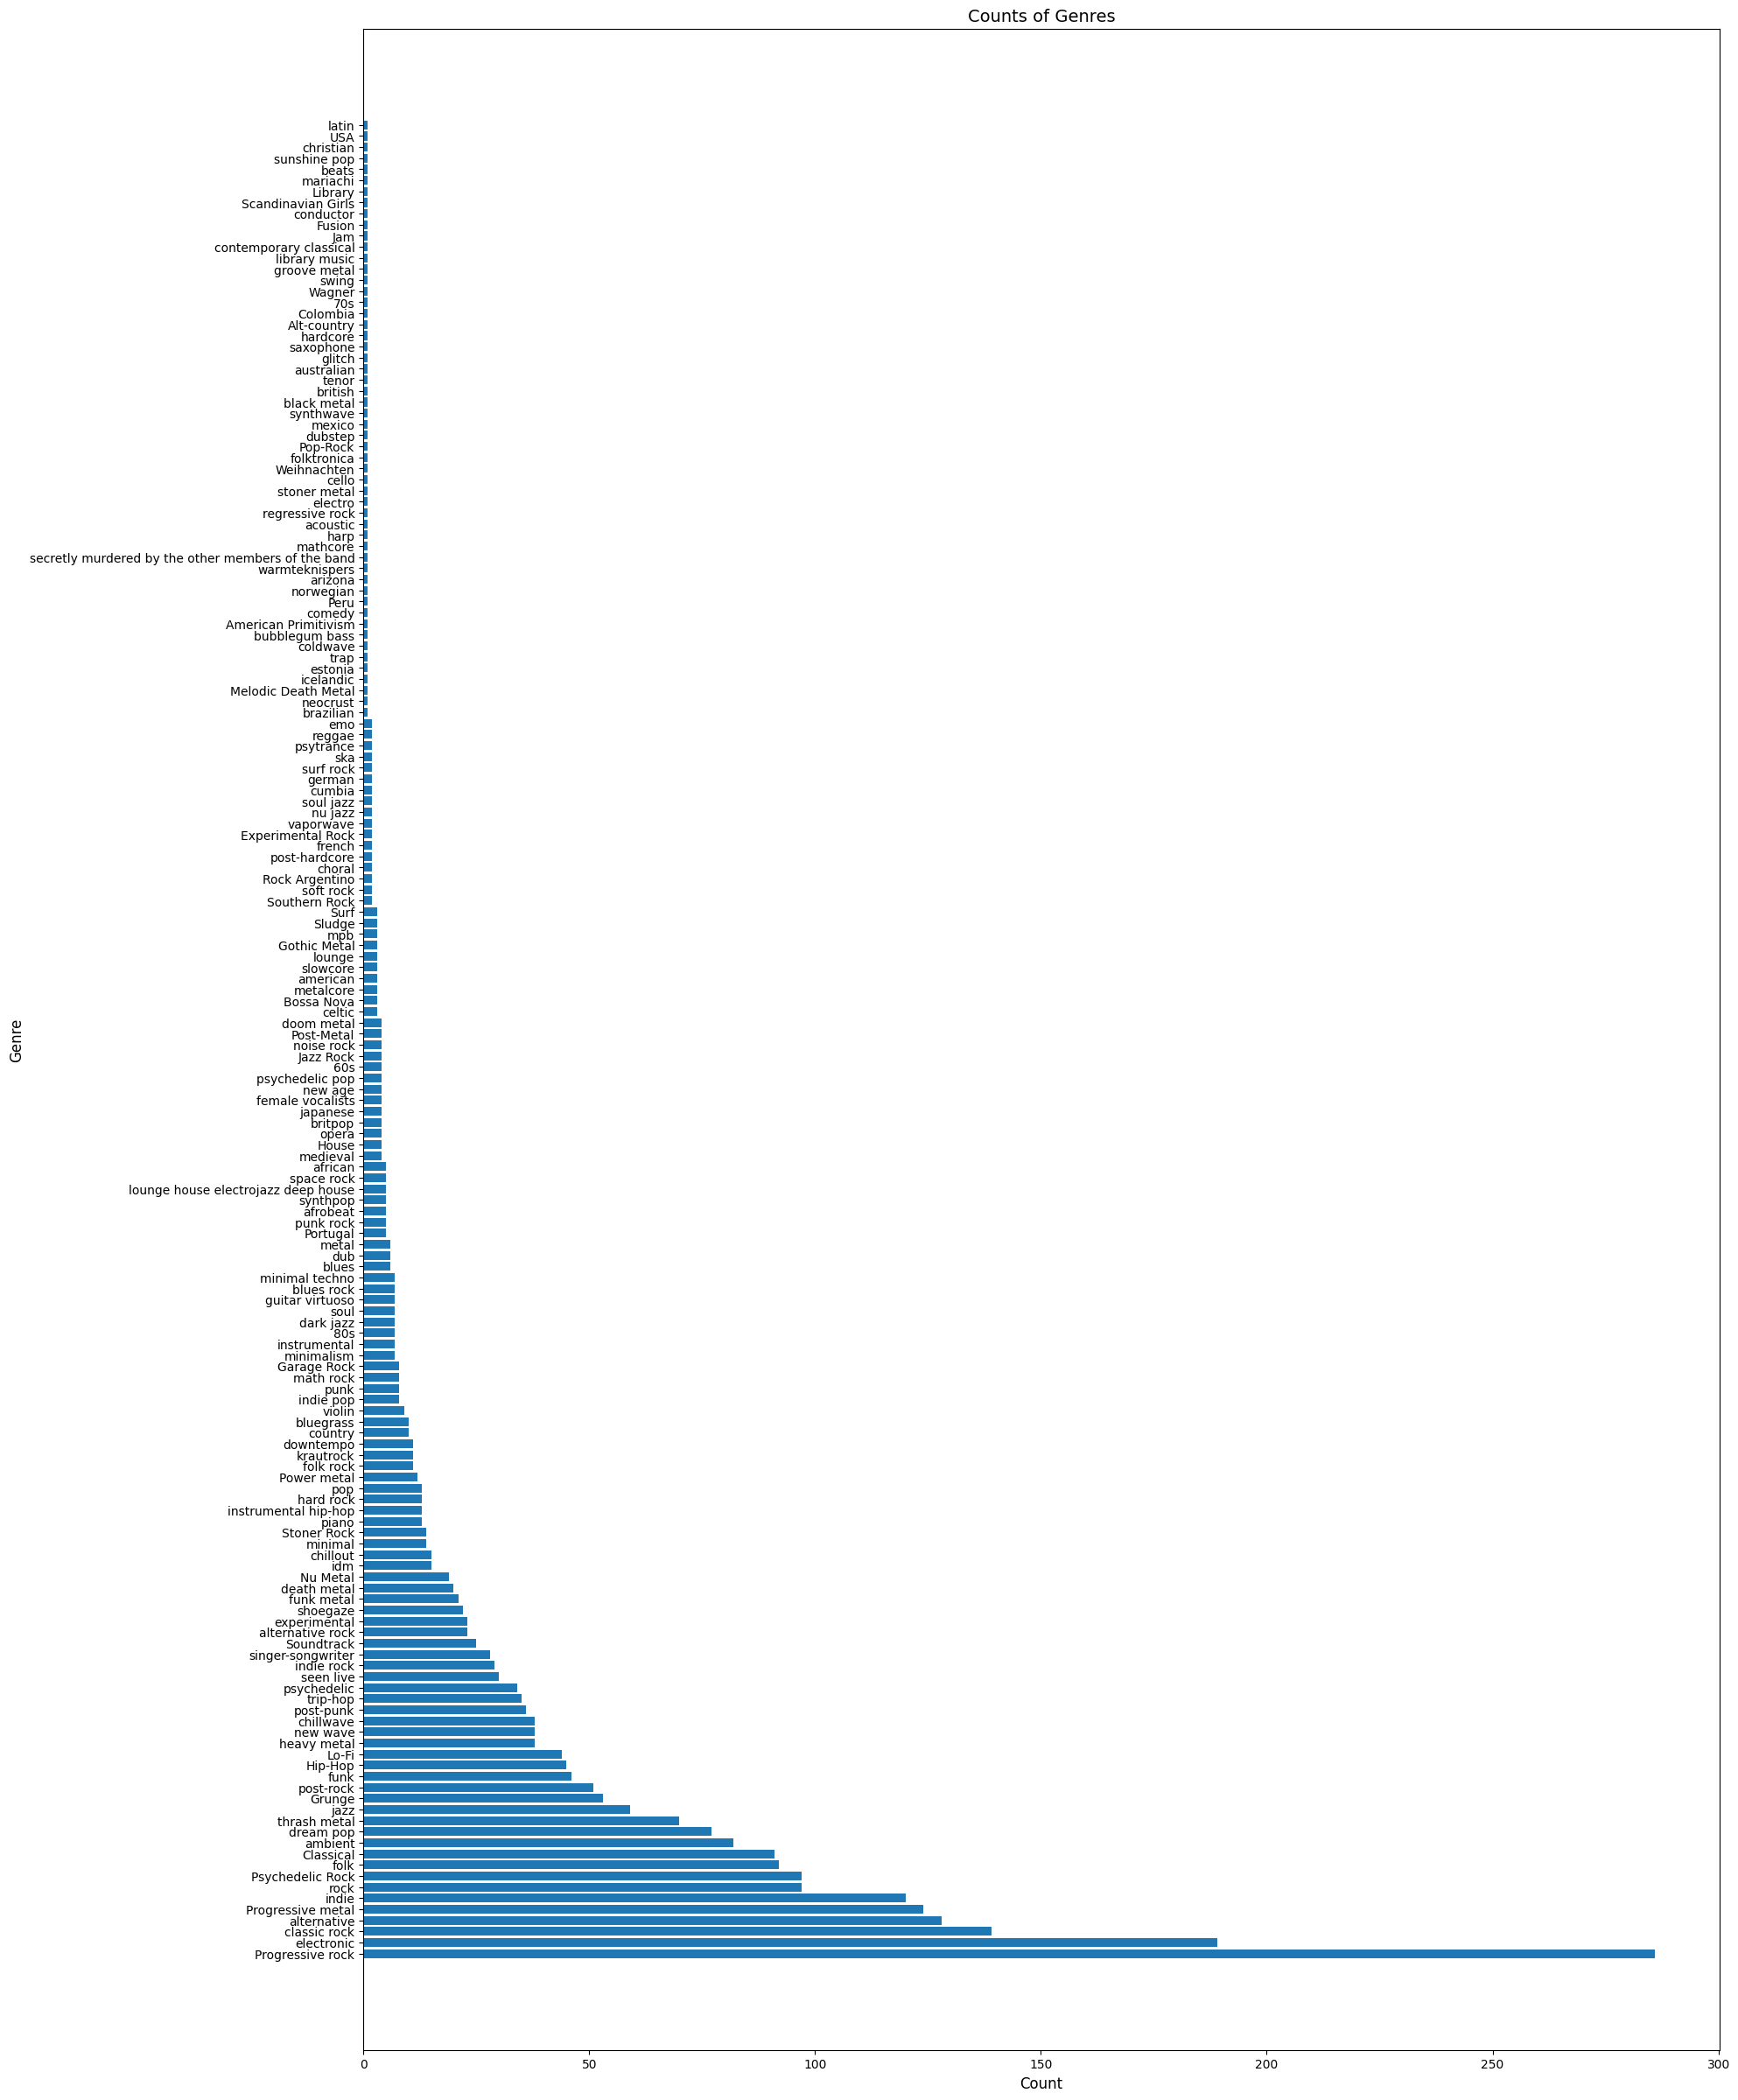

In [377]:
counts = final_df['Genre'].value_counts()
fig, ax = plt.subplots(figsize=(20,30))
ax.barh(counts.index, counts.values)

# Add labels and title to the plot
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Genre', fontsize=12)
ax.set_title('Counts of Genres', fontsize=14)

# Display the plot
plt.show()

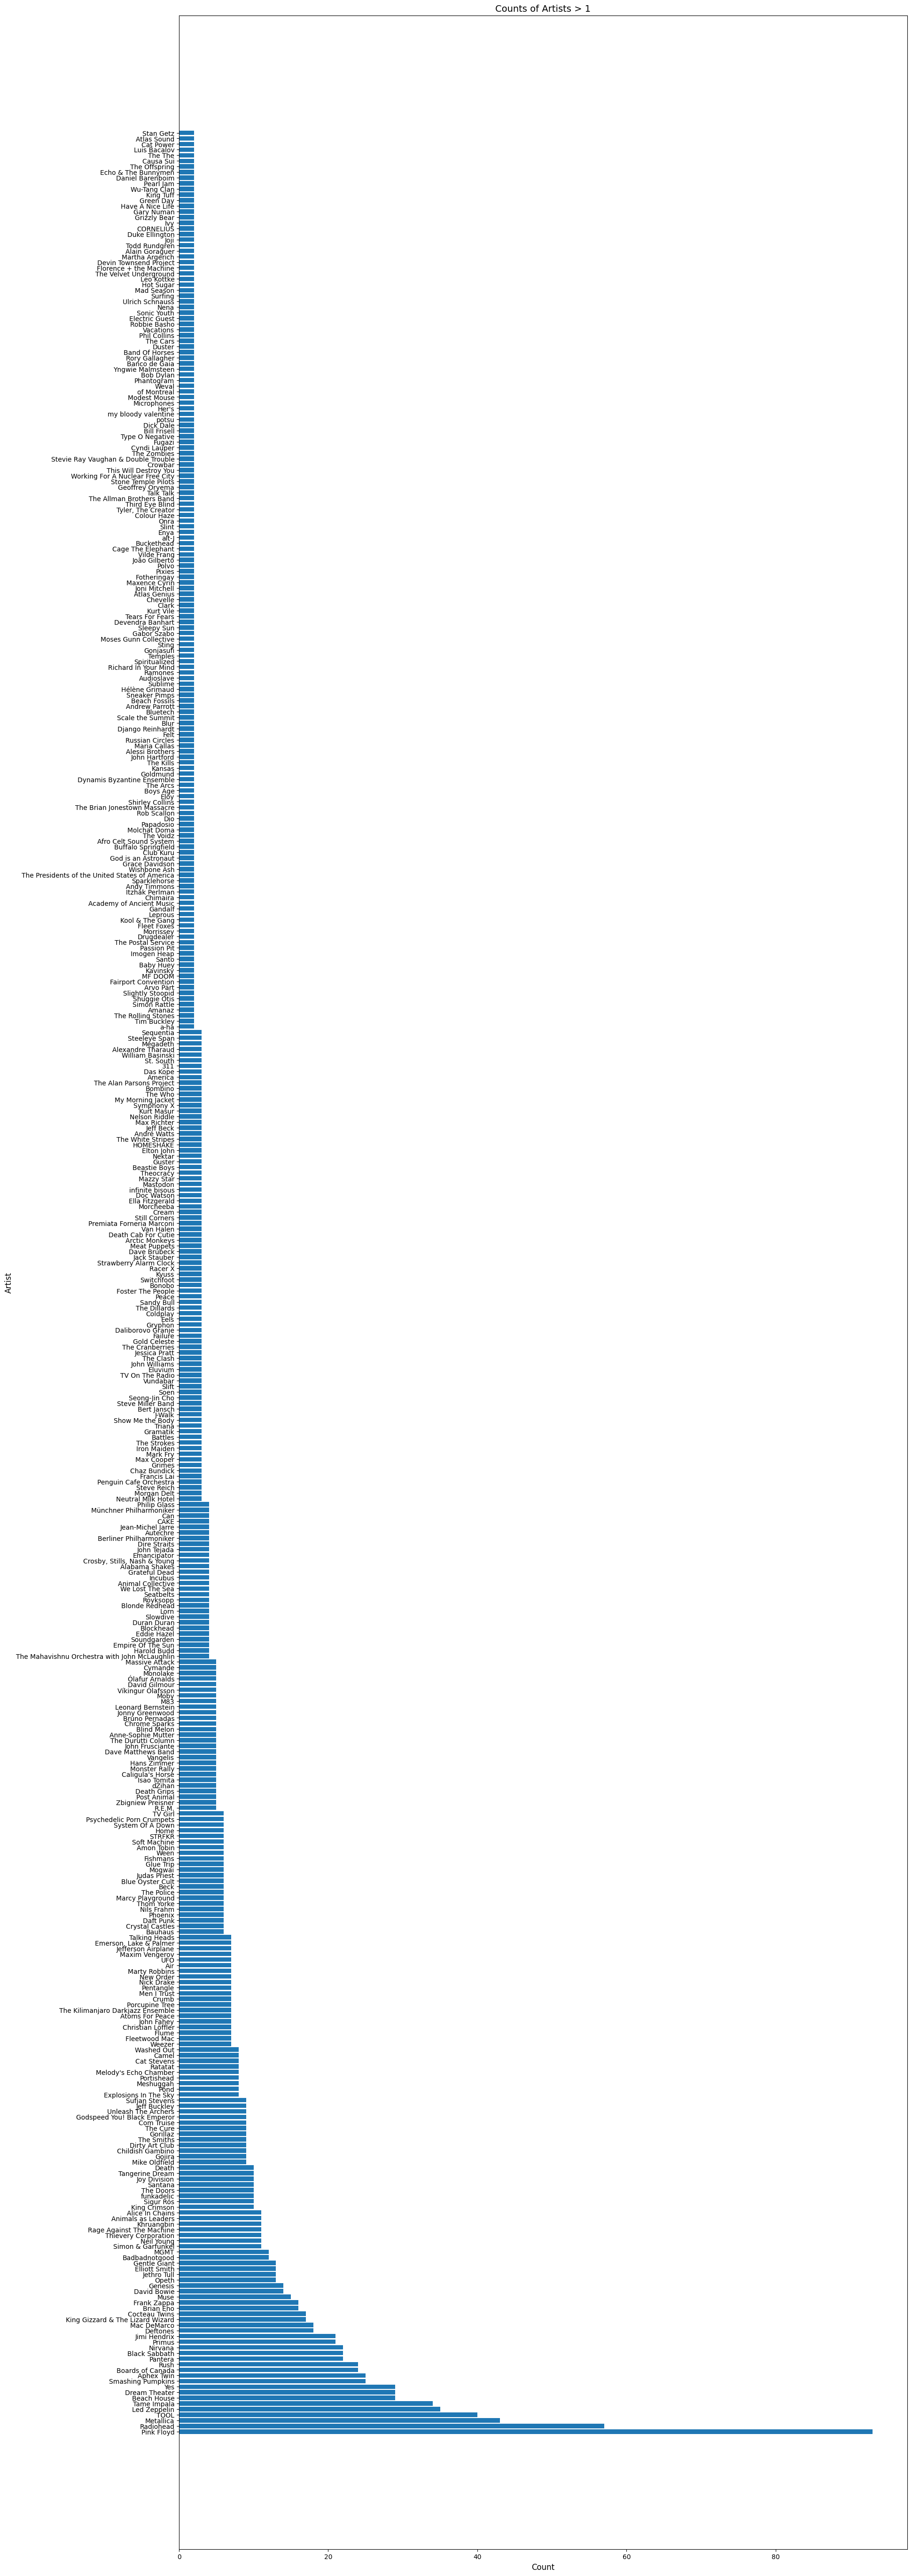

In [376]:
artistcounts= df['Artist'].value_counts()
artistcountsFiltered= artistcounts[artistcounts > 1]
fig, ax = plt.subplots(figsize=(20,70))
ax.barh(artistcountsFiltered.index, artistcountsFiltered.values)

# Add labels and title to the plot
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Artist', fontsize=12)
ax.set_title('Counts of Artists > 1', fontsize=14)

# Display the plot
plt.show()